In [1]:
# Import numpy, pandas, time and datetime
import pandas as pd
import numpy as np

# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# for plt.show() 
%matplotlib inline

# Evaluation metrics
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

# import for pre-processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import scale
# label encoding
from sklearn.preprocessing import LabelEncoder

# Import for model selection:
# splitting data into training and test data (validation set)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# filter warnings
import sys, os
import warnings
warnings.filterwarnings('ignore')

# Regular Expression 
import re 

In [2]:
#Loading train and test datasets
train_df = pd.read_excel('C:/Users/3644079/Downloads/MLCode-Mammography/train.xlsx', index_col=0)
test_df = pd.read_excel('C:/Users/3644079/Downloads/MLCode-Mammography/test.xlsx', index_col=0)

In [3]:
train_df.shape

(811, 6)

In [4]:
train_df.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
Index,,,,,,
1,5.0,67.0,lobular,spiculated,low,1
2,4.0,43.0,round,circumscribed,NaN,1
3,5.0,58.0,irregular,spiculated,low,1
4,4.0,28.0,round,circumscribed,low,0
5,5.0,74.0,round,spiculated,NaN,1


In [5]:
train_df.describe()

,BI_RADS,Age,Severity
count,809.000000,723.000000,811.000000
mean,4.379481,55.887967,0.459926
std,1.914800,16.886616,0.498699
min,0.000000,5.000000,0.000000
25%,4.000000,45.000000,0.000000
50%,4.000000,56.000000,0.000000
75%,5.000000,66.000000,1.000000
max,55.000000,130.000000,1.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 1 to 811
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BI_RADS       809 non-null    float64
 1   Age           723 non-null    float64
 2   Shape         781 non-null    object 
 3   Margin        764 non-null    object 
 4   Mass_Density  735 non-null    object 
 5   Severity      811 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 44.4+ KB


# Pre-processing on Train dataset

## BI_RADS

In [7]:
train_df.BI_RADS.value_counts()

4.0     438
5.0     312
3.0      34
2.0      13
6.0       8
0.0       3
55.0      1
Name: BI_RADS, dtype: int64

In [8]:
# Replace null value with MODE 
train_df.BI_RADS.fillna(value=train_df.BI_RADS.mode()[0], inplace=True)

In [9]:
# Filter BI_RADS within 1 to 5 
train_df = train_df[(train_df['BI_RADS'] >= 1) & (train_df['BI_RADS'] <= 5)]

In [10]:
train_df.BI_RADS.value_counts()

4.0    440
5.0    312
3.0     34
2.0     13
Name: BI_RADS, dtype: int64

In [11]:
train_df.shape

(799, 6)

## Age

In [12]:
# function for data lables in bar graph
def datalable(g):
    for p in g.patches:
        g.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')   

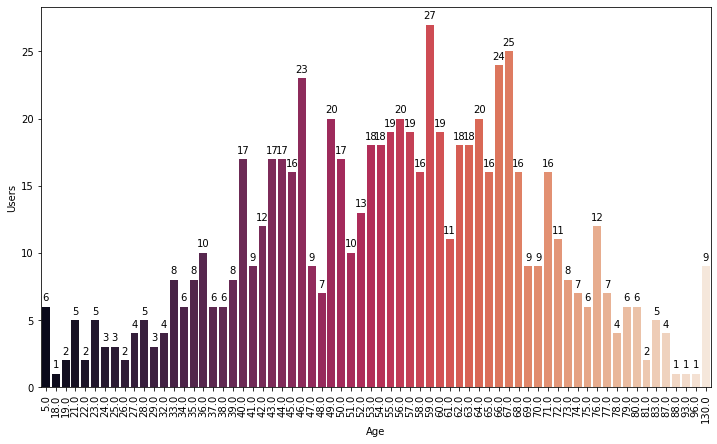

In [13]:
plt.figure(figsize=(12,7))

g = sns.barplot(train_df.groupby('Age').size().sort_values(ascending=False).index, 
                train_df.groupby('Age').size().sort_values(ascending=False).values,palette=("rocket"))
datalable(g)
plt.xlabel("Age")
plt.ylabel("Users")
plt.xticks(rotation=90);

Note : Age is normally distributed

In [14]:
train_df.Age.describe()

count    712.000000
mean      55.772472
std       16.925049
min        5.000000
25%       45.000000
50%       56.000000
75%       66.000000
max      130.000000
Name: Age, dtype: float64

In [15]:
train_df.Age.mode()

0    59.0
dtype: float64

In [16]:
# Replace null value with MODE 
train_df.Age.fillna(value=train_df.Age.mode()[0], inplace=True)

In [17]:
train_df.shape

(799, 6)

In [18]:
# Filter age within 18 to 96. Age 5 and 130 are outliers.
train_df = train_df[(train_df['Age'] >= 18) & (train_df['Age'] <= 96)]

In [19]:
train_df.shape

(784, 6)

## Shape

In [20]:
train_df.Shape.value_counts()

irregular    325
round        188
oval         174
lobular       67
Name: Shape, dtype: int64

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 1 to 811
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BI_RADS       784 non-null    float64
 1   Age           784 non-null    float64
 2   Shape         754 non-null    object 
 3   Margin        738 non-null    object 
 4   Mass_Density  709 non-null    object 
 5   Severity      784 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 42.9+ KB


In [22]:
# Replace null value with MODE 
train_df.Shape.fillna(value=train_df.Shape.mode()[0], inplace=True)

In [23]:
#percentage of missing data 
round(100*(train_df.isnull().sum()/len(train_df.index)), 2).sort_values(ascending=False)

Mass_Density    9.57
Margin          5.87
BI_RADS         0.00
Age             0.00
Shape           0.00
Severity        0.00
dtype: float64

In [24]:
# One hot encoding on Shape categorical column 
train_df = pd.concat([train_df,pd.get_dummies(train_df['Shape'], prefix='Shape')],axis=1)

In [25]:
train_df.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity,Shape_irregular,Shape_lobular,Shape_oval,Shape_round
Index,,,,,,,,,,
1,5.0,67.0,lobular,spiculated,low,1,0,1,0,0
2,4.0,43.0,round,circumscribed,NaN,1,0,0,0,1
3,5.0,58.0,irregular,spiculated,low,1,1,0,0,0
4,4.0,28.0,round,circumscribed,low,0,0,0,0,1
5,5.0,74.0,round,spiculated,NaN,1,0,0,0,1


## Margin

In [26]:
train_df.Margin.value_counts()

circumscribed     291
ill-defined       229
spiculated        109
obscured           93
microlobulated     16
Name: Margin, dtype: int64

In [27]:
# Replace null value with MODE 
train_df.Margin.fillna(value=train_df.Margin.mode()[0], inplace=True)

In [28]:
#percentage of missing data 
round(100*(train_df.isnull().sum()/len(train_df.index)), 2).sort_values(ascending=False)

Mass_Density       9.57
BI_RADS            0.00
Age                0.00
Shape              0.00
Margin             0.00
Severity           0.00
Shape_irregular    0.00
Shape_lobular      0.00
Shape_oval         0.00
Shape_round        0.00
dtype: float64

In [29]:
# One hot encoding on Margin categorical column 
train_df = pd.concat([train_df,pd.get_dummies(train_df['Margin'], prefix='Margin')],axis=1)

In [30]:
train_df.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity,Shape_irregular,Shape_lobular,Shape_oval,Shape_round,Margin_circumscribed,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated
Index,,,,,,,,,,,,,,,
1,5.0,67.0,lobular,spiculated,low,1,0,1,0,0,0,0,0,0,1
2,4.0,43.0,round,circumscribed,NaN,1,0,0,0,1,1,0,0,0,0
3,5.0,58.0,irregular,spiculated,low,1,1,0,0,0,0,0,0,0,1
4,4.0,28.0,round,circumscribed,low,0,0,0,0,1,1,0,0,0,0
5,5.0,74.0,round,spiculated,NaN,1,0,0,0,1,0,0,0,0,1


## Mass_Density

In [31]:
train_df.Mass_Density.value_counts()

low               638
iso                48
high               13
fat-containing     10
Name: Mass_Density, dtype: int64

In [32]:
# Replace null value with MODE 
train_df.Mass_Density.fillna(value=train_df.Mass_Density.mode()[0], inplace=True)

In [33]:
# Mass_Density is ordinal column. Converting categorical variable into numeric using map function.
train_df['Mass_Density_encode'] = train_df['Mass_Density'].map({'high':1, 'iso':2, 'low':3, 'fat-containing':4})

In [34]:
train_df.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity,Shape_irregular,Shape_lobular,Shape_oval,Shape_round,Margin_circumscribed,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated,Mass_Density_encode
Index,,,,,,,,,,,,,,,,
1,5.0,67.0,lobular,spiculated,low,1,0,1,0,0,0,0,0,0,1,3
2,4.0,43.0,round,circumscribed,low,1,0,0,0,1,1,0,0,0,0,3
3,5.0,58.0,irregular,spiculated,low,1,1,0,0,0,0,0,0,0,1,3
4,4.0,28.0,round,circumscribed,low,0,0,0,0,1,1,0,0,0,0,3
5,5.0,74.0,round,spiculated,low,1,0,0,0,1,0,0,0,0,1,3


## EDA (Bi-varient analysis)

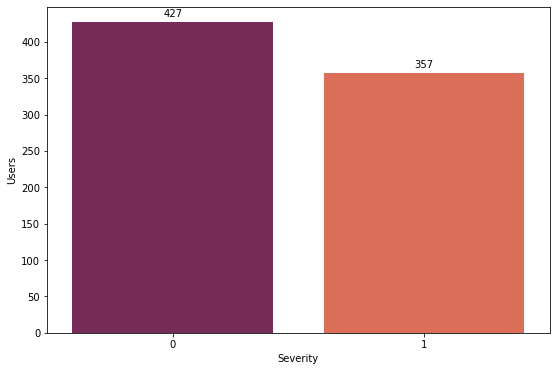

In [35]:
plt.figure(figsize=(9,6))

g = sns.barplot(train_df.groupby('Severity').size().index, train_df.groupby('Severity').size().values,palette=("rocket"))
datalable(g)
plt.xlabel("Severity")
plt.ylabel("Users");

Note : Data is evenly distributed. No need of balancing.

### 1. Shape vs Severity 

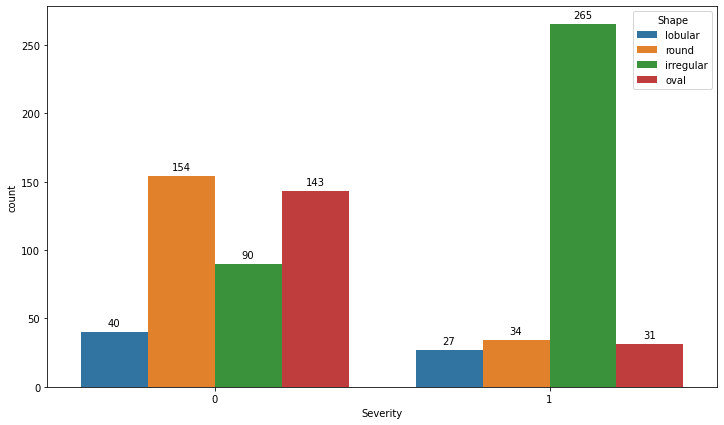

In [36]:
plt.figure(figsize=(12,7))

g = sns.countplot(x="Severity", hue="Shape", data=train_df)
datalable(g)
plt.show()


Note : Irregular shape indicated high chance of being malignant.

### 2. Margin vs Severity 

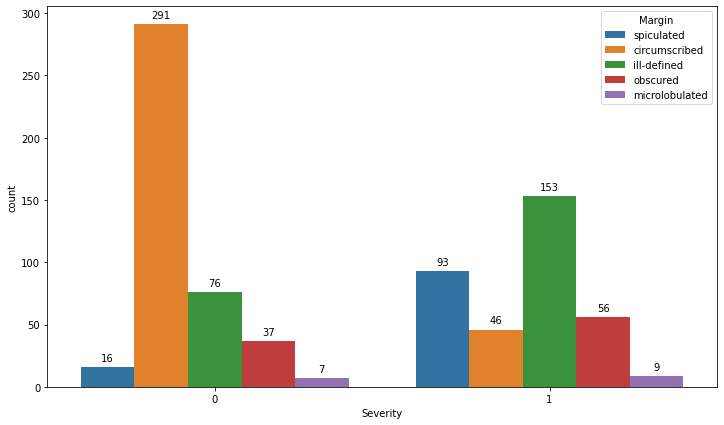

In [37]:
plt.figure(figsize=(12,7))

g = sns.countplot(x="Severity", hue="Margin", data=train_df)
datalable(g)
plt.show()

Note : Circumscribed margin indicates low chance of cancer, whereas ill-defined has high chances of being malignant.

### 3. Mass_Density vs Severity 

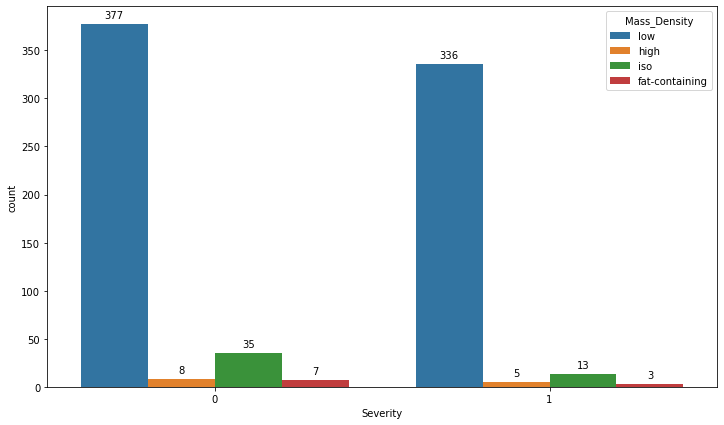

In [38]:
plt.figure(figsize=(12,7))

g = sns.countplot(x="Severity", hue="Mass_Density", data=train_df)
datalable(g)
plt.show()

### 4. Age vs Severity 

In [39]:
train_df['age_group'] = train_df.Age.apply (lambda age: 'Young' if 18<=age<=30 else 
                                          ('Adult' if 31<=age<=45 else 
                                           ('Senior' if 46<=age<=65 else 'Old')))

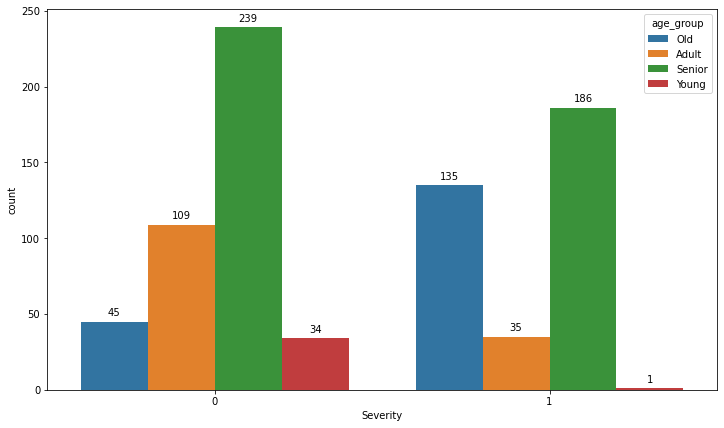

In [40]:
plt.figure(figsize=(12,7))

g = sns.countplot(x="Severity", hue="age_group", data=train_df)
datalable(g)
plt.show()

Note : Senior and old age group (46 and above) has high chance of getting malignant, whereas for young girls (18 to 30) has low chance of being malignant.

In [41]:
train_df.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity,Shape_irregular,Shape_lobular,Shape_oval,Shape_round,Margin_circumscribed,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated,Mass_Density_encode,age_group
Index,,,,,,,,,,,,,,,,,
1,5.0,67.0,lobular,spiculated,low,1,0,1,0,0,0,0,0,0,1,3,Old
2,4.0,43.0,round,circumscribed,low,1,0,0,0,1,1,0,0,0,0,3,Adult
3,5.0,58.0,irregular,spiculated,low,1,1,0,0,0,0,0,0,0,1,3,Senior
4,4.0,28.0,round,circumscribed,low,0,0,0,0,1,1,0,0,0,0,3,Young
5,5.0,74.0,round,spiculated,low,1,0,0,0,1,0,0,0,0,1,3,Old


## Pre-processing on Test dataset

In [42]:
test_df.head()

,BI_RADS,Age,Shape,Margin,Mass_Density,Severity
Index,,,,,,
1,5,65.0,lobular,ill-defined,low,1
2,5,74.0,lobular,microlobulated,low,1
3,4,NaN,oval,circumscribed,low,0
4,4,57.0,irregular,ill-defined,fat-containing,1
5,4,76.0,lobular,microlobulated,low,0


In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BI_RADS       150 non-null    int64  
 1   Age           138 non-null    float64
 2   Shape         149 non-null    object 
 3   Margin        149 non-null    object 
 4   Mass_Density  150 non-null    object 
 5   Severity      150 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 8.2+ KB


In [44]:
test_df.shape

(150, 6)

In [45]:
test_df.describe()

,BI_RADS,Age,Severity
count,150.000000,138.000000,150.000000
mean,4.180000,55.717391,0.480000
std,0.724175,17.460274,0.501274
min,0.000000,19.000000,0.000000
25%,4.000000,45.000000,0.000000
50%,4.000000,56.000000,0.000000
75%,4.000000,65.000000,1.000000
max,6.000000,130.000000,1.000000


## BI_RADS

In [46]:
#percentage of missing data 
round(100*(test_df.isnull().sum()/len(test_df.index)), 2).sort_values(ascending=False)

Age             8.00
Shape           0.67
Margin          0.67
BI_RADS         0.00
Mass_Density    0.00
Severity        0.00
dtype: float64

In [47]:
test_df.BI_RADS.value_counts()

4    109
5     33
6      3
0      2
3      2
2      1
Name: BI_RADS, dtype: int64

In [48]:
test_df = test_df[(test_df['BI_RADS'] >= 1) & (test_df['BI_RADS'] <= 5)]

In [49]:
test_df.BI_RADS.value_counts()

4    109
5     33
3      2
2      1
Name: BI_RADS, dtype: int64

In [50]:
test_df.shape

(145, 6)

## Age

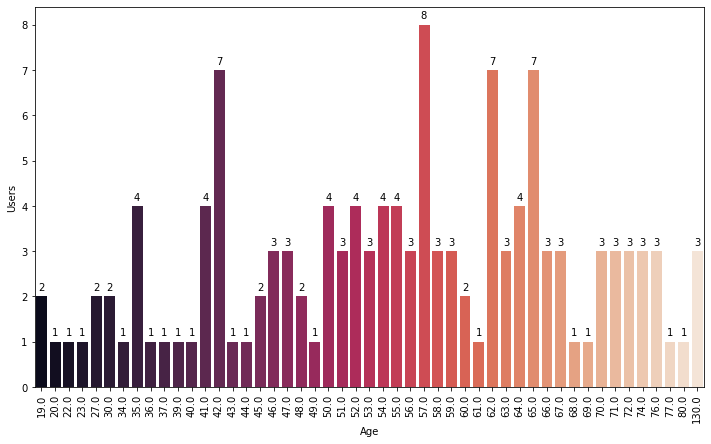

In [51]:
plt.figure(figsize=(12,7))

g = sns.barplot(test_df.groupby('Age').size().sort_values(ascending=False).index, 
                test_df.groupby('Age').size().sort_values(ascending=False).values,palette=("rocket"))
datalable(g)
plt.xlabel("Age")
plt.ylabel("Users")
plt.xticks(rotation=90);

In [52]:
test_df.Age.describe()

count    133.000000
mean      55.789474
std       17.556857
min       19.000000
25%       46.000000
50%       56.000000
75%       65.000000
max      130.000000
Name: Age, dtype: float64

In [53]:
test_df.Age.mode()

0    57.0
dtype: float64

In [54]:
# Replace null value with MODE 
test_df.Age.fillna(value=test_df.Age.mode()[0], inplace=True)

In [55]:
test_df.shape

(145, 6)

In [56]:
test_df = test_df[(test_df['Age'] >= 18) & (test_df['Age'] <= 96)]

In [57]:
test_df.shape

(142, 6)

In [58]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 1 to 150
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BI_RADS       142 non-null    int64  
 1   Age           142 non-null    float64
 2   Shape         142 non-null    object 
 3   Margin        141 non-null    object 
 4   Mass_Density  142 non-null    object 
 5   Severity      142 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 7.8+ KB


## Shape

In [59]:
test_df.Shape.value_counts()

irregular    56
oval         32
round        32
lobular      22
Name: Shape, dtype: int64

In [60]:
test_df = pd.concat([test_df,pd.get_dummies(test_df['Shape'], prefix='Shape')],axis=1)
test_df.drop(['Shape'],axis=1, inplace=True)

In [61]:
test_df.head()

,BI_RADS,Age,Margin,Mass_Density,Severity,Shape_irregular,Shape_lobular,Shape_oval,Shape_round
Index,,,,,,,,,
1,5,65.0,ill-defined,low,1,0,1,0,0
2,5,74.0,microlobulated,low,1,0,1,0,0
3,4,57.0,circumscribed,low,0,0,0,1,0
4,4,57.0,ill-defined,fat-containing,1,1,0,0,0
5,4,76.0,microlobulated,low,0,0,1,0,0


## Margin

In [62]:
test_df.Margin.value_counts()

circumscribed     58
ill-defined       41
spiculated        20
obscured          15
microlobulated     7
Name: Margin, dtype: int64

In [63]:
# Replace null value with MODE 
test_df.Margin.fillna(value=test_df.Margin.mode()[0], inplace=True)

In [64]:
#percentage of missing data 
round(100*(test_df.isnull().sum()/len(test_df.index)), 2).sort_values(ascending=False)

BI_RADS            0.0
Age                0.0
Margin             0.0
Mass_Density       0.0
Severity           0.0
Shape_irregular    0.0
Shape_lobular      0.0
Shape_oval         0.0
Shape_round        0.0
dtype: float64

In [65]:
test_df = pd.concat([test_df,pd.get_dummies(test_df['Margin'], prefix='Margin')],axis=1)
test_df.drop(['Margin'],axis=1, inplace=True)

In [66]:
test_df.head()

,BI_RADS,Age,Mass_Density,Severity,Shape_irregular,Shape_lobular,Shape_oval,Shape_round,Margin_circumscribed,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated
Index,,,,,,,,,,,,,
1,5,65.0,low,1,0,1,0,0,0,1,0,0,0
2,5,74.0,low,1,0,1,0,0,0,0,1,0,0
3,4,57.0,low,0,0,0,1,0,1,0,0,0,0
4,4,57.0,fat-containing,1,1,0,0,0,0,1,0,0,0
5,4,76.0,low,0,0,1,0,0,0,0,1,0,0


## Mass_Density

In [67]:
test_df.Mass_Density.value_counts()

low               129
iso                 9
high                3
fat-containing      1
Name: Mass_Density, dtype: int64

In [68]:
test_df['Mass_Density_encode'] = test_df['Mass_Density'].map({'high':1, 'iso':2, 'low':3, 'fat-containing':4})
test_df.drop(['Mass_Density'],axis=1, inplace=True)

In [69]:
test_df.head()

,BI_RADS,Age,Severity,Shape_irregular,Shape_lobular,Shape_oval,Shape_round,Margin_circumscribed,Margin_ill-defined,Margin_microlobulated,Margin_obscured,Margin_spiculated,Mass_Density_encode
Index,,,,,,,,,,,,,
1,5,65.0,1,0,1,0,0,0,1,0,0,0,3
2,5,74.0,1,0,1,0,0,0,0,1,0,0,3
3,4,57.0,0,0,0,1,0,1,0,0,0,0,3
4,4,57.0,1,1,0,0,0,0,1,0,0,0,4
5,4,76.0,0,0,1,0,0,0,0,1,0,0,3


## Model Building 

In [70]:
# Removing categorical columns
train_df.drop(['Shape','Margin','Mass_Density','age_group'],axis=1, inplace=True)

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 1 to 811
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   BI_RADS                784 non-null    float64
 1   Age                    784 non-null    float64
 2   Severity               784 non-null    int64  
 3   Shape_irregular        784 non-null    uint8  
 4   Shape_lobular          784 non-null    uint8  
 5   Shape_oval             784 non-null    uint8  
 6   Shape_round            784 non-null    uint8  
 7   Margin_circumscribed   784 non-null    uint8  
 8   Margin_ill-defined     784 non-null    uint8  
 9   Margin_microlobulated  784 non-null    uint8  
 10  Margin_obscured        784 non-null    uint8  
 11  Margin_spiculated      784 non-null    uint8  
 12  Mass_Density_encode    784 non-null    int64  
dtypes: float64(2), int64(2), uint8(9)
memory usage: 53.7 KB


In [72]:
train_df.shape

(784, 13)

In [73]:
test_df.shape

(142, 13)

In [74]:
# Seperating dependent and independent variables from train and test dataset.
y_train = train_df.Severity.to_frame()
x_train = train_df.drop(['Severity'], axis=1)
y_test = test_df.Severity.to_frame()
x_test = test_df.drop(['Severity'], axis=1)

### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_log = metrics.accuracy_score(y_test, y_pred)
precision_log = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_log = metrics.recall_score(y_test, y_pred, pos_label=1)
f1score_log = metrics.f1_score(y_test, y_pred, pos_label=1)

print("Accuracy : ",accuracy_log)
print("Precision : ", precision_log)
print("Recall : ", recall_log)
print("F1-score : ", f1score_log)

Accuracy :  0.7887323943661971
Precision :  0.8301886792452831
Recall :  0.676923076923077
F1-score :  0.7457627118644068


### Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_random = metrics.accuracy_score(y_test, y_pred)
precision_random = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_random = metrics.recall_score(y_test, y_pred, pos_label=1)
f1score_random = metrics.f1_score(y_test, y_pred, pos_label=1)

print("Accuracy : ",accuracy_random)
print("Precision : ", precision_random)
print("Recall : ", recall_random)
print("F1-score : ", f1score_random)

Accuracy :  0.7746478873239436
Precision :  0.7894736842105263
Recall :  0.6923076923076923
F1-score :  0.7377049180327868


### Ada Boost

In [77]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_ada = metrics.accuracy_score(y_test, y_pred)
precision_ada = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_ada = metrics.recall_score(y_test, y_pred, pos_label=1)
f1score_ada = metrics.f1_score(y_test, y_pred, pos_label=1)

print("Accuracy : ",accuracy_ada)
print("Precision : ", precision_ada)
print("Recall : ", recall_ada)
print("F1-score : ", f1score_ada)

Accuracy :  0.7887323943661971
Precision :  0.972972972972973
Recall :  0.5538461538461539
F1-score :  0.7058823529411765


### XGBoost

In [78]:
from xgboost import XGBClassifier

model = XGBClassifier(eval_metric='mlogloss')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_xg = metrics.accuracy_score(y_test, y_pred)
precision_xg = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_xg = metrics.recall_score(y_test, y_pred, pos_label=1)
f1score_xg = metrics.f1_score(y_test, y_pred, pos_label=1)

print("Accuracy : ",accuracy_xg)
print("Precision : ", precision_xg)
print("Recall : ", recall_xg)
print("F1-score : ", f1score_xg)

Accuracy :  0.7535211267605634
Precision :  0.7777777777777778
Recall :  0.6461538461538462
F1-score :  0.7058823529411764


### Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_decision = metrics.accuracy_score(y_test, y_pred)
precision_decision = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_decision = metrics.recall_score(y_test, y_pred, pos_label=1)
f1score_decision = metrics.f1_score(y_test, y_pred, pos_label=1)

print("Accuracy : ",accuracy_decision)
print("Precision : ", precision_decision)
print("Recall : ", recall_decision)
print("F1-score : ", f1score_decision)

Accuracy :  0.7323943661971831
Precision :  0.7647058823529411
Recall :  0.6
F1-score :  0.6724137931034482


### SVM

In [80]:
from sklearn import svm, datasets

# Build the model and the corresponding predictions
C = 1.0
svc = svm.SVC(kernel='linear', C=C,random_state=1).fit(x_train, y_train)
y_pred = svc.predict(x_test)

accuracy_svm = metrics.accuracy_score(y_test, y_pred)
precision_svm = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_svm = metrics.recall_score(y_test, y_pred, pos_label=1)
f1score_svm = metrics.f1_score(y_test, y_pred, pos_label=1)

print("Accuracy : ",accuracy_svm)
print("Precision : ", precision_svm)
print("Recall : ", recall_svm)
print("F1-score : ", f1score_svm)

Accuracy :  0.7535211267605634
Precision :  1.0
Recall :  0.46153846153846156
F1-score :  0.631578947368421


### KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
KNeighClf = KNeighborsClassifier(n_neighbors=15)
KNN = KNeighClf.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

accuracy_KNN = metrics.accuracy_score(y_test, y_pred)
precision_KNN = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_KNN = metrics.recall_score(y_test, y_pred, pos_label=1)
f1score_KNN = metrics.f1_score(y_test, y_pred, pos_label=1)

print("Accuracy : ",accuracy_KNN)
print("Precision : ", precision_KNN)
print("Recall : ", recall_KNN)
print("F1-score : ", f1score_KNN)

Accuracy :  0.7816901408450704
Precision :  0.7833333333333333
Recall :  0.7230769230769231
F1-score :  0.752


In [82]:
data = {'Models':['Logistics regression','Random Forest','Ada boost', 'XGBoost','Decision Tree', 'SVM', 'KNN'],
        'Accuracy':[accuracy_log,accuracy_random,accuracy_ada,accuracy_xg,accuracy_decision,accuracy_svm,accuracy_KNN],
       'Precision': [precision_log,precision_random,precision_ada,precision_xg,precision_decision,precision_svm,precision_KNN],
       'Recall': [recall_log,recall_random,recall_ada,recall_xg,recall_decision,recall_svm,recall_KNN],
       'F1-score':[f1score_log,f1score_random,f1score_ada,f1score_xg,f1score_decision,f1score_svm,f1score_KNN]}

### ALL MODEL EVALUATION

In [83]:
df = pd.DataFrame(data)
df

,Models,Accuracy,Precision,Recall,F1-score
0,Logistics regression,0.788732,0.830189,0.676923,0.745763
1,Random Forest,0.774648,0.789474,0.692308,0.737705
2,Ada boost,0.788732,0.972973,0.553846,0.705882
3,XGBoost,0.753521,0.777778,0.646154,0.705882
4,Decision Tree,0.732394,0.764706,0.600000,0.672414
5,SVM,0.753521,1.000000,0.461538,0.631579
6,KNN,0.781690,0.783333,0.723077,0.752000


## Hyper parameter tunning

In [84]:
# Creating the hyperparameter grid for all the models

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': range(1,15),
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': range(1,20)
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': range(1,20)
        }
    },
    'KNN' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': range(1,20)
        }
    },
    'Ada_boost' : {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': range(1,20)
        }
    },
    'XGboost' : {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'params': {
            'n_estimators': range(1,20)
        }
    }
}

In [85]:
# Keeping score for all the models in a dataframe
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.832933,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.795942,{'n_estimators': 3}
2,logistic_regression,0.843108,{'C': 5}
3,KNN,0.820211,{'n_neighbors': 11}
4,Ada_boost,0.843132,{'n_estimators': 3}
5,XGboost,0.829095,{'n_estimators': 3}


### Running models with best parameter values

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression(C=5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_log = metrics.accuracy_score(y_test, y_pred)
precision_log = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_log = metrics.recall_score(y_test, y_pred, pos_label=1)
f1score_log = metrics.f1_score(y_test, y_pred, pos_label=1)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=13)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_random = metrics.accuracy_score(y_test, y_pred)
precision_random = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_random = metrics.recall_score(y_test, y_pred, pos_label=1)
f1score_random = metrics.f1_score(y_test, y_pred, pos_label=1)

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=3)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_ada = metrics.accuracy_score(y_test, y_pred)
precision_ada = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_ada = metrics.recall_score(y_test, y_pred, pos_label=1)
f1score_ada = metrics.f1_score(y_test, y_pred, pos_label=1)

from xgboost import XGBClassifier

model = XGBClassifier(eval_metric='mlogloss',n_estimators=3 )
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_xg = metrics.accuracy_score(y_test, y_pred)
precision_xg = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_xg = metrics.recall_score(y_test, y_pred, pos_label=1)
f1score_xg = metrics.f1_score(y_test, y_pred, pos_label=1)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy_decision = metrics.accuracy_score(y_test, y_pred)
precision_decision = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_decision = metrics.recall_score(y_test, y_pred, pos_label=1)
f1score_decision = metrics.f1_score(y_test, y_pred, pos_label=1)

from sklearn import svm, datasets

# Build the model and the corresponding predictions
C = 1.0
svc = svm.SVC(kernel='linear', C=C,random_state=1).fit(x_train, y_train)
y_pred = svc.predict(x_test)

accuracy_svm = metrics.accuracy_score(y_test, y_pred)
precision_svm = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_svm = metrics.recall_score(y_test, y_pred, pos_label=1)
f1score_svm = metrics.f1_score(y_test, y_pred, pos_label=1)

from sklearn.neighbors import KNeighborsClassifier
KNeighClf = KNeighborsClassifier(n_neighbors=11)
KNN = KNeighClf.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

accuracy_KNN = metrics.accuracy_score(y_test, y_pred)
precision_KNN = metrics.precision_score(y_test, y_pred, pos_label=1)
recall_KNN = metrics.recall_score(y_test, y_pred, pos_label=1)
f1score_KNN = metrics.f1_score(y_test, y_pred, pos_label=1)

In [87]:
data2 = {'Models':['Logistics regression','Random Forest','Ada boost', 'XGBoost','Decision Tree', 'SVM', 'KNN'],
        'Accuracy':[accuracy_log,accuracy_random,accuracy_ada,accuracy_xg,accuracy_decision,accuracy_svm,accuracy_KNN],
       'Precision': [precision_log,precision_random,precision_ada,precision_xg,precision_decision,precision_svm,precision_KNN],
       'Recall': [recall_log,recall_random,recall_ada,recall_xg,recall_decision,recall_svm,recall_KNN],
       'F1-score':[f1score_log,f1score_random,f1score_ada,f1score_xg,f1score_decision,f1score_svm,f1score_KNN]}

In [88]:
df = pd.DataFrame(data2)
df

,Models,Accuracy,Precision,Recall,F1-score
0,Logistics regression,0.802817,0.862745,0.676923,0.758621
1,Random Forest,0.767606,0.796296,0.661538,0.722689
2,Ada boost,0.802817,0.974359,0.584615,0.730769
3,XGBoost,0.802817,0.803279,0.753846,0.777778
4,Decision Tree,0.725352,0.760000,0.584615,0.660870
5,SVM,0.753521,1.000000,0.461538,0.631579
6,KNN,0.795775,0.781250,0.769231,0.775194


Note : 
    Since we are working on Cancer detection, __false negetive__ values should be lowest. To measure the same, __RECALL__ is the best parameter.
    From above comparision, XGBoost performed the best.
    